# Logistic regression

Preparing data

In [1]:
import random
random.seed(123)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Ada\AppData\Local\conda\conda\envs\mgr\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from  sklearn.utils import resample

In [4]:
file = pd.ExcelFile('churn_data_python.xls')

In [5]:
print(file.sheet_names)

['bigml_5a132e5f7811dd1184001048']


In [6]:
data = file.parse('bigml_5a132e5f7811dd1184001048')

In [7]:
data.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,censor
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [8]:
data_maj = data[data.churn==0]
data_min = data[data.churn==1]

In [9]:
data_min_upsampled = resample(data_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=2850,    # to match majority class
                                 random_state=123) # reproducible results

In [10]:
dataset = pd.concat([data_maj, data_min_upsampled])

In [11]:
dataset

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,censor
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,6,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,7,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,8,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0
8,9,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,10,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0


In [12]:
y = dataset.iloc[:,18]

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [14]:
X = dataset.iloc[:, 1:18]

In [15]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [16]:
dataset.corr()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,censor
id,1.000000,0.060778,0.002292,-0.035180,-0.038199,0.020526,0.028970,0.020526,0.021711,-0.024501,0.021742,0.015018,0.003032,0.014993,-0.010481,-0.058024,-0.010639,0.018223,0.058163,0.058163
account_length,0.060778,1.000000,0.025528,0.004773,-0.000721,-0.011334,0.033823,-0.011333,-0.029744,0.037153,-0.029738,-0.043719,-0.022146,-0.043700,-0.013996,0.008591,-0.014010,0.006677,0.022419,0.022419
international_plan,0.002292,0.025528,1.000000,0.009822,0.009674,0.021427,-0.031292,0.021418,0.005589,-0.019100,0.005603,-0.071867,0.012013,-0.071871,0.158175,-0.035652,0.157919,-0.093943,0.274583,0.274583
voice_mail_plan,-0.035180,0.004773,0.009822,1.000000,0.962364,-0.119594,-0.018748,-0.119588,-0.038162,-0.006826,-0.038144,-0.035239,0.026342,-0.035296,0.006044,0.042256,0.006091,0.003130,-0.166119,-0.166119
number_vmail_messages,-0.038199,-0.000721,0.009674,0.962364,1.000000,-0.113184,-0.018184,-0.113178,-0.040385,-0.005315,-0.040360,-0.032486,0.016666,-0.032553,0.013476,0.045853,0.013508,0.004264,-0.147756,-0.147756
total_day_minutes,0.020526,-0.011334,0.021427,-0.119594,-0.113184,1.000000,0.030804,1.000000,0.145548,0.018665,0.145537,0.059588,0.021278,0.059561,-0.002691,0.055790,-0.002449,-0.199820,0.264000,0.264000
total_day_calls,0.028970,0.033823,-0.031292,-0.018748,-0.018184,0.030804,1.000000,0.030797,0.017837,0.003396,0.017839,0.037356,-0.026789,0.037360,-0.002559,0.009212,-0.002426,0.000784,0.039349,0.039349
total_day_charge,0.020526,-0.011333,0.021418,-0.119588,-0.113178,1.000000,0.030797,1.000000,0.145551,0.018665,0.145540,0.059587,0.021283,0.059560,-0.002696,0.055797,-0.002454,-0.199816,0.263994,0.263994
total_eve_minutes,0.021711,-0.029744,0.005589,-0.038162,-0.040385,0.145548,0.017837,0.145551,1.000000,0.026097,1.000000,0.007625,0.030661,0.007577,-0.005454,-0.020384,-0.005515,-0.099183,0.134720,0.134720
total_eve_calls,-0.024501,0.037153,-0.019100,-0.006826,-0.005315,0.018665,0.003396,0.018665,0.026097,1.000000,0.026101,-0.004189,0.007054,-0.004190,-0.006653,0.031301,-0.006584,-0.010681,0.024191,0.024191


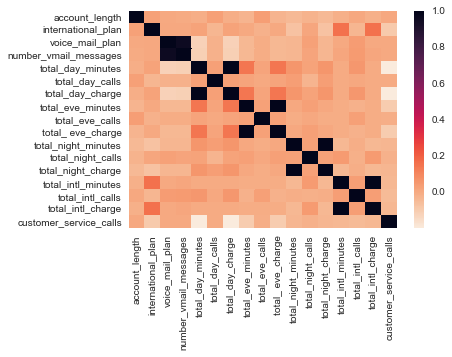

In [17]:
sns.heatmap(dataset.iloc[:,1:18].corr(), cmap=sns.cm.rocket_r)
plt.show()

In [18]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [19]:
rfe = RFE(logreg, 1)

In [20]:
rfe = rfe.fit(X, y )

In [21]:
print(rfe.ranking_)

[17  1  2  9 11 14  6 12 15  5 13 16  8 10  7  4  3]


In [22]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_ eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [23]:
new_X = X.drop(X.columns[[3, 4, 7, 10, 13]], axis=1)

In [24]:
new_X.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_ eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls
0,128,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=0)

In [26]:
import statsmodels.api as sm

In [27]:
logit_model=sm.Logit(y_train,X_train)

In [28]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.545844
         Iterations 6


In [29]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3990
Model:                          Logit   Df Residuals:                     3978
Method:                           MLE   Df Model:                           11
Date:                Sun, 20 May 2018   Pseudo R-squ.:                  0.2125
Time:                        10:48:46   Log-Likelihood:                -2177.9
converged:                       True   LL-Null:                       -2765.5
                                        LLR p-value:                3.655e-245
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account_length            -0.0027      0.001     -2.935      0.003      -0.004      -0.001
international_plan         2.1314      0.121     17.671      0.000       1.895       2.368
voic

In [30]:
X_train.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_ eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls
2780,77,0,0,95,31.60,98,18.02,81,12.70,4,3.05,3
978,63,0,0,102,47.26,114,22.64,118,10.08,4,3.54,4
1934,105,0,0,124,47.82,96,25.63,109,9.13,3,2.35,0
871,98,0,0,119,46.14,102,16.18,118,12.81,6,3.00,4
2402,77,0,1,101,24.31,102,18.04,120,4.72,4,4.13,5


In [31]:
new2_X = new_X.drop(new_X.columns[10], axis=1)
new2_X.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_ eve_charge,total_night_calls,total_night_charge,total_intl_calls,customer_service_calls
0,128,0,1,110,45.07,99,16.78,91,11.01,3,1
1,107,0,1,123,27.47,103,16.62,103,11.45,3,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,2
4,75,1,0,113,28.34,122,12.61,121,8.41,3,3


In [32]:
X_train, X_test, y_train, y_test = train_test_split(new2_X, y, test_size=0.3, random_state=0)

In [33]:
logit_model2=sm.Logit(y_train,X_train)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.545988
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3990
Model:                          Logit   Df Residuals:                     3979
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 May 2018   Pseudo R-squ.:                  0.2123
Time:                        10:49:48   Log-Likelihood:                -2178.5
converged:                       True   LL-Null:                       -2765.5
                                        LLR p-value:                5.821e-246
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account_length            -0.0026      0.001     -2.889      0.004      -0.004      

Final model on the training and test set

In [34]:
file = pd.ExcelFile('churn_data_python2.xls')

In [35]:
data = file.parse('bigml_5a132e5f7811dd1184001048')

In [36]:
data_maj = data[data.churn==0]
data_min = data[data.churn==1]

In [37]:
data_min_upsampled = resample(data_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=2850,    # to match majority class
                                 random_state=123) # reproducible results

In [38]:
dataset = pd.concat([data_maj, data_min_upsampled])
dataset.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_ eve_charge,total_night_calls,total_night_charge,total_intl_calls,customer_service_calls,churn
0,128,0,1,110,45.07,99,16.78,91,11.01,3,1,0
1,107,0,1,123,27.47,103,16.62,103,11.45,3,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,0,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,2,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,3,0


In [39]:
y = dataset.iloc[:,11]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [40]:
X = dataset.iloc[:,:11]
X.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_ eve_charge,total_night_calls,total_night_charge,total_intl_calls,customer_service_calls
0,128,0,1,110,45.07,99,16.78,91,11.01,3,1
1,107,0,1,123,27.47,103,16.62,103,11.45,3,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,2
4,75,1,0,113,28.34,122,12.61,121,8.41,3,3


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
logit_model_fin=sm.Logit(y_train,X_train)
result_fin=logit_model_fin.fit()
print(result_fin.summary())

Optimization terminated successfully.
         Current function value: 0.545988
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3990
Model:                          Logit   Df Residuals:                     3979
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 May 2018   Pseudo R-squ.:                  0.2123
Time:                        10:52:36   Log-Likelihood:                -2178.5
converged:                       True   LL-Null:                       -2765.5
                                        LLR p-value:                5.821e-246
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account_length            -0.0026      0.001     -2.889      0.004      -0.004      

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [44]:
logreg = LogisticRegression()

In [45]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.77


In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


--- Confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [50]:
print(confusion_matrix)

[[668 205]
 [194 643]]


--- Performance of the model

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       873
          1       0.76      0.77      0.76       837

avg / total       0.77      0.77      0.77      1710



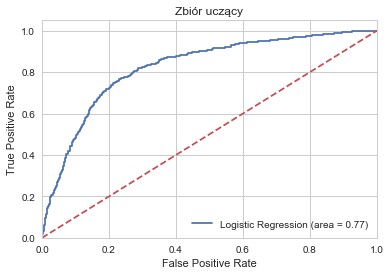

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zbiór uczący')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
logit_roc_auc

0.7666589776468131

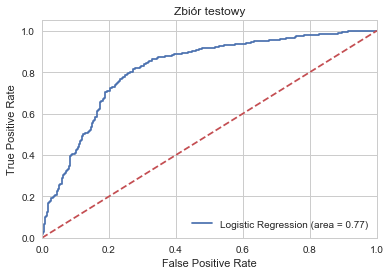

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zbiór testowy')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [56]:
logit_roc_auc

0.7666986907093325